In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
import nltk
import numpy as np
import seaborn as sns
import gensim
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 1. Data

In [6]:
reviews = pd.read_csv('/content/DisneylandReviews.csv', encoding='latin-1')
reviews = reviews.dropna()

In [7]:
reviews.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong ...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time ...",Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid when I was visiting the park o...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortunately there is quite a bit of...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids lik...",Disneyland_HongKong


In [9]:
reviews = reviews[["Review_Text", "Rating"]]
reviews = reviews.drop_duplicates(subset='Review_Text')

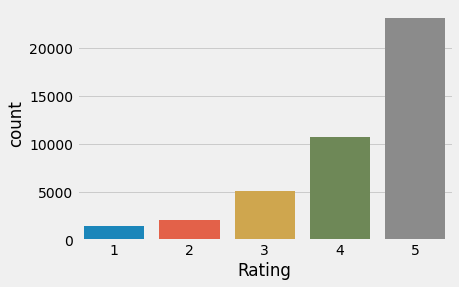

In [10]:
# Create a bar plot with value counts

sns.countplot(x='Rating', data=reviews)

# 2.  Data Cleaning and Preprocessing

In [11]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [12]:
def text_preprocessing(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

In [13]:
reviews['Review_Clean_List'] = list(map(text_preprocessing, reviews.Review_Text))

In [14]:
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [52]:
pd.set_option('display.max_colwidth', 15000)
reviews.sample()

,Review_Text,Rating,Review_Clean_List,Review_Clean
9375,"Meeting Disney Character is like a dream come true! Me went from 12 pm to the closing, it has so many things to offer, and I won't ever forget the beautiful fireworks.Of course it's not really an adventure for adrenaline, but it sure is fun. Really really fun!I'm looking forward to come back.",5,"[meet, character, like, dream, come, true, go, 12, pm, close, many, things, offer, ever, forget, beautiful, fireworks, course, really, adventure, adrenaline, sure, fun, really, really, fun, look, forward, come, back]",meet character like dream come true go 12 pm close many things offer ever forget beautiful fireworks course really adventure adrenaline sure fun really really fun look forward come back


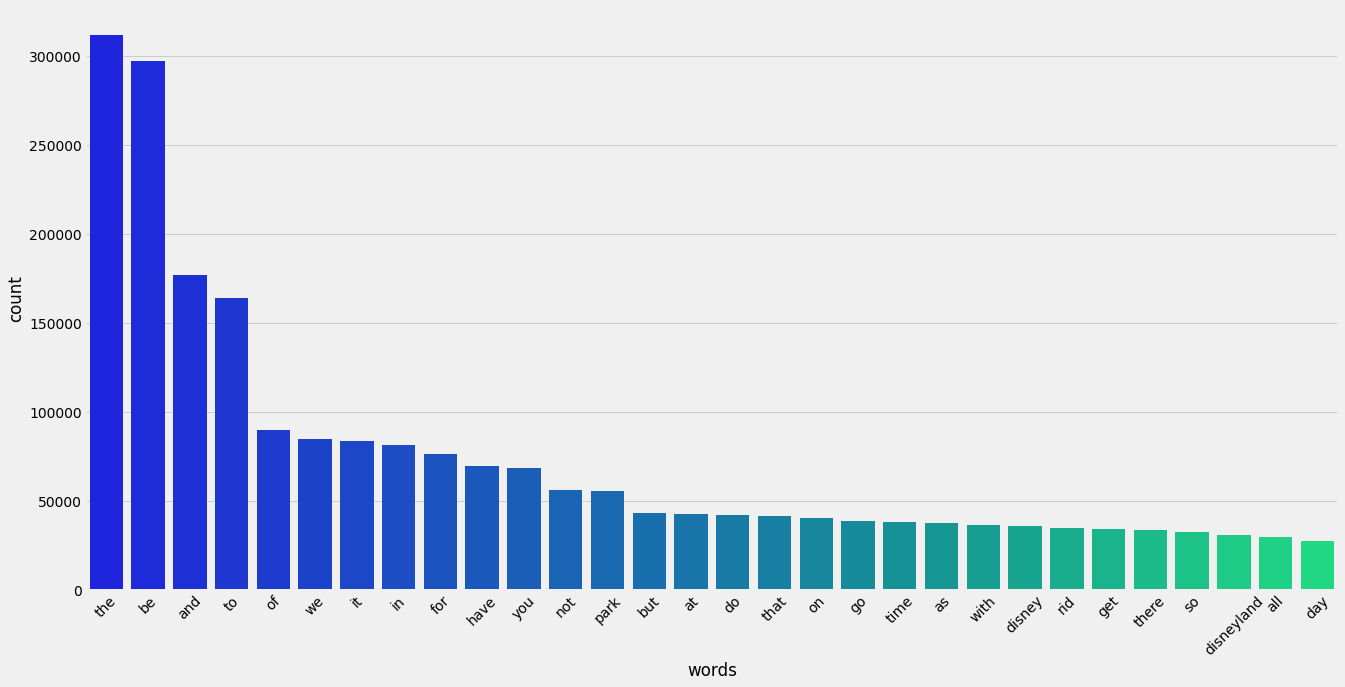

In [16]:
# Join  text together
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

In [17]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['park', 'disney', 'disneyland'])

In [18]:
reviews['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in reviews['Review_Clean_List']]

In [19]:
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

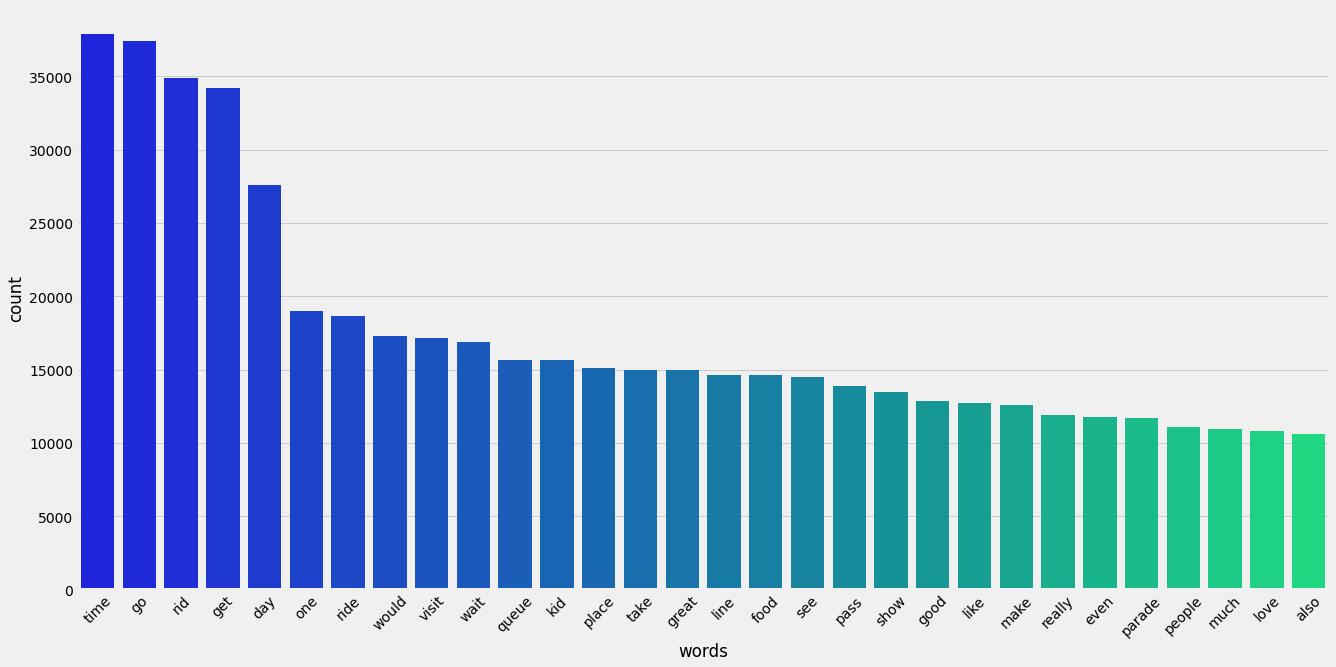

In [20]:
from collections import Counter

# Join  text together
review_words = ','.join(list(reviews['Review_Clean'].values))

# Count each word
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

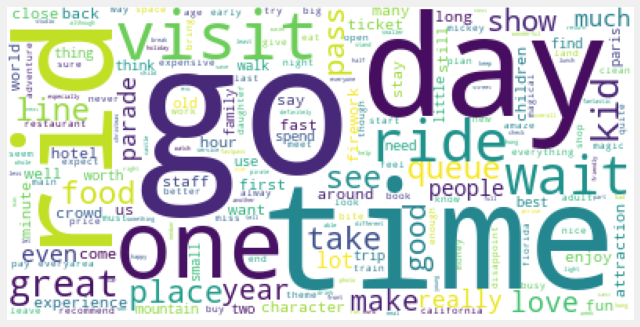

In [21]:
# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)
                      
# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# 3. Bag-of-Words

In [22]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(reviews['Review_Clean_List'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in reviews['Review_Clean_List']]

# 4. Determining the Number of Topics

In [35]:
from gensim.models import CoherenceModel
# Compute Coherence Score
number_of_topics = []
coherence_score = []
for i in range(1,6):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           iterations=50,
                                           num_topics=i)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews['Review_Clean_List'], dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda);

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [36]:
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics, 'coherence_score':coherence_score})

In [37]:
topic_coherence

,number_of_topics,coherence_score
0,1,0.292660
1,2,0.311713
2,3,0.329169
3,4,0.341985
4,5,0.342998


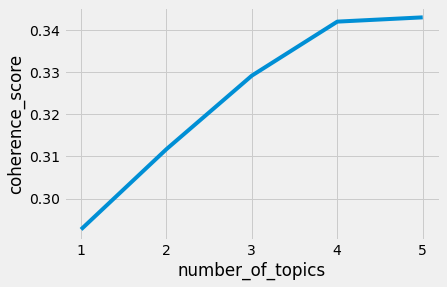

In [38]:
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

# 5. Topic Modeling with LDA

In [39]:
n_topics = 4

from sklearn.decomposition import LatentDirichletAllocation

# lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0, verbose=0)
# lda_topic_matrix = lda_model.fit_transform(document_term_matrix)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True);
#lda_topic_matrix = lda_model;

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [40]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.048*"queue" + 0.041*"get" + 0.023*"wait" + 0.021*"go" + 0.020*"time" + 0.020*"day" + 0.019*"kid" + 0.016*"rid" + 0.016*"ride" + 0.015*"minutes"


Topic: 1 Word: 0.024*"go" + 0.018*"time" + 0.015*"would" + 0.013*"take" + 0.012*"food" + 0.011*"good" + 0.011*"one" + 0.011*"rid" + 0.010*"stay" + 0.009*"great"


Topic: 2 Word: 0.030*"hotel" + 0.016*"ticket" + 0.014*"us" + 0.012*"get" + 0.011*"book" + 0.011*"breakfast" + 0.010*"euros" + 0.010*"village" + 0.009*"service" + 0.009*"train"


Topic: 3 Word: 0.041*"paris" + 0.018*"ride" + 0.016*"mountain" + 0.014*"magic" + 0.014*"love" + 0.013*"show" + 0.013*"florida" + 0.011*"world" + 0.010*"space" + 0.010*"kid"




# 6. Visualising with pyLDAvis

In [41]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.147229  0.002234       1        1  50.234637
3      0.144085 -0.251803       2        1  18.669448
0      0.073674  0.289612       3        1  18.145978
2     -0.364988 -0.040044       4        1  12.949936, topic_info=      Term          Freq         Total Category  logprob  loglift
17   queue  23015.000000  23015.000000  Default  30.0000  30.0000
940  paris  20022.000000  20022.000000  Default  29.0000  29.0000
56     get  34541.000000  34541.000000  Default  28.0000  28.0000
615  hotel  12769.000000  12769.000000  Default  27.0000  27.0000
165     go  42441.000000  42441.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
916   give   2204.939602   4111.789859   Topic4  -5.0463   1.4209
56     get   4069.445665  34541.295952   Topic4  -4.4334  -0.0946
24    walk   1957.725947   7296.098057   Topic4  -5.1652   0.7285
779    use   1657.433595   5665.203362   Topic4  -5.3317   0.8150
16     one   1764.461917  17458.202310   Topic4  -5.2691  -0.2479

[219 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
108       3  0.999918     10
490       3  0.999533     12
524       3  0.999953     15
460       3  0.999952     20
393       3  0.999877     30
...     ...       ...    ...
27        2  0.398717  worth
27        3  0.601261  worth
154       1  1.000000  would
511       1  0.989720   year
511       2  0.010307   year

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])